<a href="https://colab.research.google.com/github/ecordeiro/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Bruxelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bruxelas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Bruxelas(Capital da Bélgica), e ver quais insights podem ser extraídos a partir de dados brutos. O arquivo contém informações sobre os imóveis disponíveis para aluguel no Airbnb na região metropolitana de Bruxelas.** Os dados podem ser baixados diretamente clicando [aqui](http://data.insideairbnb.com/belgium/bru/brussels/2021-07-13/visualisations/listings.csv).

## Obtenção dos Dados

Os dados foram obtidos no site insideairbnb, e atualizados em 13/07/2021

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/belgium/bru/brussels/2021-07-13/visualisations/listings.csv')

## Funções

In [ ]:
def dummie(latributs,data_frame):
    """
      Função para transformar uma coluna com dados categóricos em várias colunas com dados binários.
      Parametros:
        latributs -> Lista com nomes das colunas com dados categóricos
        data_frame -> Dataframe com os dados originais
      Retorno:
        Dataframe ja com as novas colunas e valores transformados
    """
    l_df_retorno = []
    for column in latributs:
        df = pd.get_dummies(data_frame[column],
                             prefix=column,
                             prefix_sep='_',
                             dummy_na=False, 
                             columns=None, 
                             sparse=False, 
                             drop_first=False, 
                             dtype=None)
        l_df_retorno.append(df)
    return pd.concat(l_df_retorno,axis=1)

## Análise dos Dados

As variáveis disponibilizdas pela Airbnb estão descritas abaixo.

**Dicionário das variáveis**

* **id**: Identificador do Imóvel a ser alugado
* **name**: Descrição do Imóvel a ser alugado
* **host_id**: número de identificação do proprietário do imóvel. Um host poderá ter mais de um imóvel para ser alugado.
* **host_name**: nome do proprietário do imóvel.
* **neighbourhood_group**: O grupo de vizinhança. Todos os valores estão nulos.
* **neighbourhood**: Nome dos bairros dos imóveis. 
A vizinhança foi geocodificada usando a latitude e longitude em comparação com as vizinhanças definidas por shapefiles digitais abertos ou públicos.
* **latitude**: Valor da latitude do imóvel.
* **longitude**: Valor da longitude do imóvel.
* **room_type**: Tipo de Imóvel ('Entire home/apt', 'Hotel room', 'Private room', 'Shared room')
* **price**: Preço da diária do Imóvel
* **minimum_nights**: Mínimo de noites para aluguel
* **number_of_reviews**: número de comentários de clientes que alugaram anteriormente
* **last_review**: data do último comentário
* **reviews_per_month**: % do número de comentários em relação ao número de locações realizadas por mês.
* **calculated_host_listings_count**: Número de imoveis do Host
* **availability_365**: Quantidade de diárias disponíveis durante o ano.

 
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85702,4.30771,Entire home/apt,90,2,16,2017-06-30,0.19,2,264
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85709,4.30757,Entire home/apt,74,2,2,2018-10-28,0.03,2,363
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.85182,4.36809,Hotel room,91,1,3,2010-11-06,0.11,2,338
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200,2,0,NaN,NaN,1,365
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,74,5,105,2020-02-28,1.00,1,285


### Um pouco mais dos dados

Percebemos que existem 5718 linhas e 16 colunas no conjunto de dados, ou seja, 5718 imóveis disponíveis para locação e 16 varíaveis que identificam algum atríbuto referente a cada locação.

### **Valores ausentes:**  
Nesta etapa, analisamos os valores ausentes no intuito de identificar se realmente são valores "ausentes" ou se podemos "corrigir" os valores, preenchendo de alguma maneira que faça sentido no conjunto de dados.

Para tratar dados nulos, temos algumas opções, não se limitando há:
- **Eliminar as colunas que contém dados nulos:** evita a perda de linhas do dataframe mas também corre o risco de perder informações que seriam importantes para o modelo de Machine Learning.
- **Elimnar as linhas que contém dados nulos:** evita a perda da coluna, mas reduzindo o volume de observacões do dataframe, o que pode ser bastante prejudicial dependendo do volume e tipos das informações.
- **Substituir os valores por média, media, zero, etc:** nesta abordagem é importante observar se não estamos enviesando o cunjunto de dados obtendo resultados incorretos na criação do modelo de Machine Learning.
- **Substituir a coluna por novas colunas categóricas:** evita perda da coluna e das linhas mas nem sempre é possível aplicar devido a quantidade de colunas que serão criadas poder aumentar consideralvelmente o tempo das próximas etapas da criação do modelo de ML.
- **Também é necessário observar os critérios acima para dados com valores zerados ou preenchidos com a string "null"**

No código abaixo tentamos identificar se existe algum dado nulo que esteja armazanado no dataframe como string, o que poderia nos levar a conclusões indevidas em algum momento. Não identificamos nenhum valor nulo armazenado como string

In [ ]:
df.select_dtypes(include='object').apply(lambda x: x.str.upper()).isin(['NAN','NULL']).sum()

name             0
host_name        0
neighbourhood    0
room_type        0
last_review      0
dtype: int64

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.857020,4.307710,Entire home/apt,90,2,16,2017-06-30,0.19,2,264
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.857090,4.307570,Entire home/apt,74,2,2,2018-10-28,0.03,2,363
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.851820,4.368090,Hotel room,91,1,3,2010-11-06,0.11,2,338
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.837710,4.407070,Entire home/apt,200,2,0,NaN,NaN,1,365
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.833620,4.360570,Entire home/apt,74,5,105,2020-02-28,1.00,1,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,50984808,Superbe appartement avec vue à 180° sur Bruxelles,172199938,Fatima Zahra,NaN,Anderlecht,50.828120,4.312830,Entire home/apt,45,19,0,NaN,NaN,1,215
5714,50996533,Spacious & luminous 1bedroom apart. in city ce...,145225916,Miguel,NaN,Bruxelles,50.848990,4.346680,Entire home/apt,56,2,0,NaN,NaN,1,211
5715,50998142,F1/1 chambre double en plein centre de Bruxelles,50439322,Ced,NaN,Bruxelles,50.848714,4.352421,Private room,33,1,0,NaN,NaN,10,355
5716,50998386,F1 appartement neuf au cœur de Bruxelles,50439322,Ced,NaN,Bruxelles,50.849230,4.352730,Entire home/apt,91,1,0,NaN,NaN,10,363


Ja no código abaixo analisamos os valores nulos que estejam armazenados como tal e detectamos que os 4 primeiros itens precisam ser analisandos no sentido descrito anteriormente.

In [ ]:
#Verificar percentual de dados nulos
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '% de dados nulos'])
missing_data.head(20)

,Total,% de dados nulos
neighbourhood_group,5718,100.0
reviews_per_month,1130,19.8
last_review,1130,19.8
host_name,2,0.0
availability_365,0,0.0
calculated_host_listings_count,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0


A variável **neighbourhood_group** deve ser eliminada pelo % de dados nulos que ela contém, mas eliminar as variáveis **reviews_per_month** e **last_review** significa perder um volume significativo de informações em que estes valores não são nulos. Desta forma, uma opção seria a substituição dos valores nulos.

### Seguindo a análise dos dados ausentes.

* Analisando a quantidade de valores não nulos nas variáveis **reviews_per_month** e **last_review**.


In [ ]:
df[['reviews_per_month','last_review']].notna().sum()

reviews_per_month    4588
last_review          4588
dtype: int64

* Analisando se existe uma relação entre os valores nulos e o **número de reviews**.

In [ ]:
df[df.reviews_per_month.isnull()][['reviews_per_month','number_of_reviews','last_review']].drop_duplicates()

,reviews_per_month,number_of_reviews,last_review
3,NaN,0,NaN



* As Variáveis **reviews_per_month e last_review**, estão nulas por não existirem reviews realizadas. Dessa forma, não será necessário fazer a exclusão das linhas. No lugar da exclusão vamos preencher a reviews_per_month com "0" onde esta for nula e a last_review iremos substituir por quatro categorias de dados.


---



### Reviews_per_month substituindo null por 0

In [ ]:
df.reviews_per_month.fillna(0, inplace=True)

### last_review: Serão criados 4 categorias.
- 0 - Sem nenhum comentário
- 1 - último comentário de 1 a 365 dias
- 2 - último comentário 366 a 1095 dias
- 3 - último comentário há mais de 1095 dias

In [ ]:
def categoria_last_review(campo):
    '''
    Função que recebe cada linha do dataframe e testa em qual categoria o número de dias a última revisão vai se enquadrar
    '''
    retorno = 0
    if campo.time_last_review >= 1 and campo.time_last_review <= 365:
        retorno = 1
    elif campo.time_last_review >= 366 and campo.time_last_review <= 1095:
        retorno = 2
    elif campo.time_last_review > 1095:
        retorno = 3
    
    return retorno

In [ ]:
# Cria uma nova coluna temporária para guardar a diferença de dias entre o último comentário e o dia de atualização do arquivo
df.last_review.fillna(0, inplace=True)
where = df.last_review == 0
df.loc[where,'time_last_review'] = 0

In [ ]:
# Armazenda a diferença de dias na coluna time_last_review
where = df.time_last_review.isna()
df.loc[where,'time_last_review'] = df[where].apply(lambda x: (pd.to_datetime('2021-07-13') - pd.to_datetime(x.last_review, format='%Y-%m-%d')), axis=1)
df.loc[where,'time_last_review'] = df[where].apply(lambda x: int(str(x.time_last_review).split()[0]),axis=1)
df.loc[:,'time_last_review'] = df.time_last_review.astype(np.int32)

In [ ]:
# Cria uma nova coluna categ_last_review trocando os tempo da última revisão pelas categorias definidas.
df['categ_last_review'] = df.apply(categoria_last_review, axis=1)

In [ ]:
# Exclui as duas colunas, last_review e time_last_review
df.drop(['last_review','time_last_review'], axis=1, inplace=True)

* Analisando host_name

In [ ]:
host_id_lst = list(df[df.host_name.isnull()]['host_id'])

In [ ]:
df[df.host_id.isin(host_id_lst)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,categ_last_review
789,8979970,"Duplex loft Midi station, close to the city ce...",12105893,NaN,NaN,Anderlecht,50.83379,4.33105,Entire home/apt,100,4,24,0.36,1,29,3
2412,28998246,Luxury Brussels Design Loft with a view .,6435844,NaN,NaN,Jette,50.86632,4.33253,Entire home/apt,99,2,1,0.03,1,358,2


* Percebemos que somente duas linhas estão nulas. Fizemos uma busca na base pelo host_id, para tentar identificar o host_name, mas sem sucesso.
* Mediante deste resultado, optamos por preencher o valor nulo com o mesmo valor do host_id.

In [ ]:
df.loc[df.host_name.isnull(),'host_name'] = df.loc[df.host_name.isnull()]['host_id']

In [ ]:
df.drop(['neighbourhood_group'],axis=1, inplace=True)

* **Verificando novamente os dados nulos**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

categ_last_review                 0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

### Após as transformações realizadas, percebemos que não existe mais dados nulos pois foram transformados de maneira coerente com os dados apresentados.



---



### **Distribuição das variáveis** 

Como neste momento não existem mais variáveis nulas, é importante conhecer melhor a distribuição dos dados disponíveis. 
Abaixo iremos imprimir os histogramas de cada váriável numérica.

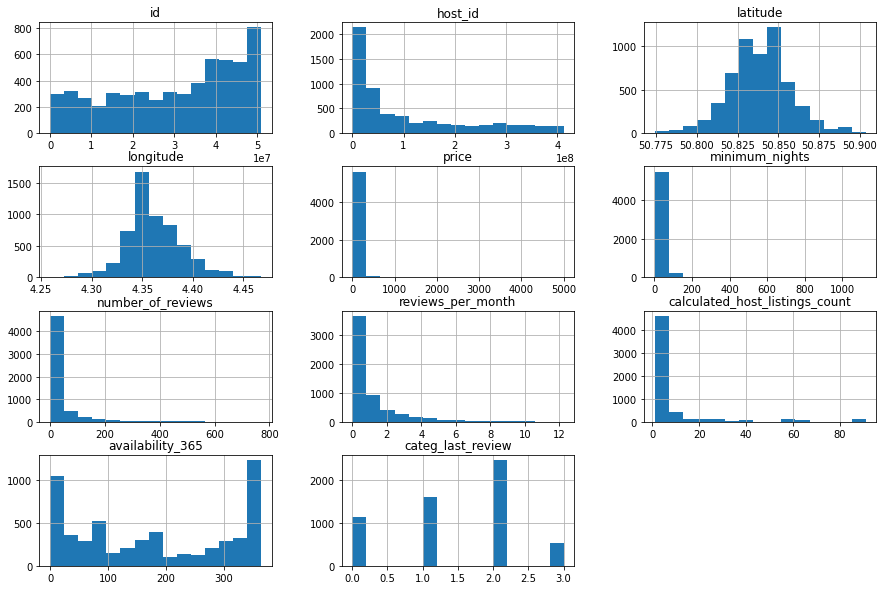

In [ ]:
df.hist(bins=15, figsize=(15,10));

Analisando as distribuições acima, percebemos duas próximas a **distribuição normal** nas colunas **latitude e longitude**.

Ja nas colunas **price, minimum_nights, number_of_reviews, reviews_per_month e calculated_host_listings_count**, é possível perceber uma possível presença de **outliers**.

As colunas **id e host_id**, por se tratarem de identificadores únicos não necessitam de análise, assim como a coluna **neighbourhood_group**, onde não existem dados válidos.

Na coluna **availability_365**, será necessário uma avaliação mais aprofundada, pois não foi possível identificar visualmente um tipo de distribuição conhecido.

Na coluna **categ_last_review**, é possível identificar que existem muitos imóveis que nunca foram locados e também que a maioria deles possuem comentários entre 366 e 1095 dias.


### **Análise de Outliers**

*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.


<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

Para iniciar a análise, utilizamos de **recursos estatísticos** que nos possibilita ter uma visão numérica dos dados

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,categ_last_review
count,5.718000e+03,5.718000e+03,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,3.033152e+07,1.056474e+08,50.838571,4.361439,83.652151,10.054215,33.890171,0.998541,7.185729,180.273872,1.416579
std,1.542586e+07,1.180736e+08,0.018555,0.027471,144.053468,37.243069,67.936768,1.477502,15.618846,135.466496,0.908024
min,2.352000e+03,2.582000e+03,50.774130,4.258890,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.746350e+07,1.709387e+07,50.826930,4.345105,43.000000,1.000000,1.000000,0.060000,1.000000,49.000000,1.000000
50%,3.384563e+07,4.609152e+07,50.838401,4.356425,60.000000,2.000000,7.000000,0.420000,1.000000,169.000000,2.000000
75%,4.384281e+07,1.722988e+08,50.849720,4.377543,89.000000,4.000000,33.000000,1.260000,4.000000,327.000000,2.000000
max,5.099906e+07,4.123949e+08,50.903680,4.467680,5000.000000,1125.000000,771.000000,12.240000,91.000000,365.000000,3.000000


Confirmando a análise anterior, percebe-se uma diferença significativa nas variáveis **price, minimum_nights, number_of_reviews e calculated_host_listings_count.**

Importante realizarmos a exclusão dos outliers nestes casos para evitar problemas de viés na criação do modelo.

### Aplicando tratamento de **outlier** na variável **price**







In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  46.0
Limite superior de price:  158.0
Limite inferior de price:  -26.0


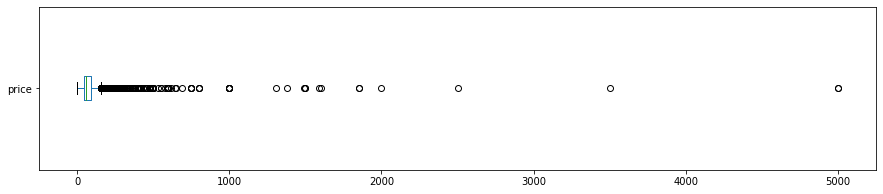

price: valores acima de 158.0000:
426 entradas
7.4502%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("price: valores acima de {:,.4f}:".format(sup_price))
print("{} entradas".format(len(df[df.price > sup_price])))
print("{:.4f}%".format((len(df[df.price > sup_price]) / df.shape[0])*100))

### Aplicando tratamento de **outlier** na variável **minimum_nights**

In [ ]:
# identificando os outliers para a variável price
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de price: ', sup_minimum_nights)
print('Limite inferior de price: ', inf_minimum_nights)

IQR da variável minimum_nights:  3.0
Limite superior de price:  8.5
Limite inferior de price:  -3.5


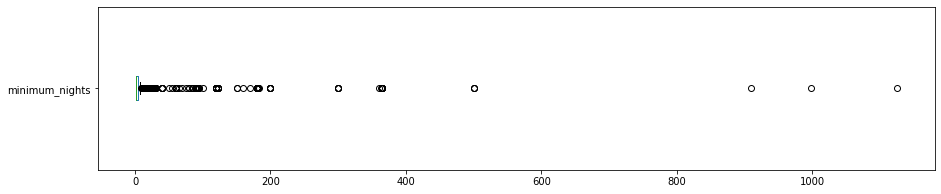

minimum_nights: valores acima de 8.5000:
775 entradas
13.5537%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de {:,.4f}:".format(sup_minimum_nights))
print("{} entradas".format(len(df[df.minimum_nights > sup_minimum_nights])))
print("{:.4f}%".format((len(df[df.minimum_nights > sup_minimum_nights]) / df.shape[0])*100))

### Aplicando tratamento de **outlier** na variável **number_of_reviews**

In [ ]:
# identificando os outliers para a variável number_of_reviews
q1_number_of_reviews = df.number_of_reviews.quantile(.25)
q3_number_of_reviews = df.number_of_reviews.quantile(.75)
IQR_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
print('IQR da variável number_of_reviews: ', IQR_number_of_reviews)

# definindo os limites                                       
sup_number_of_reviews = q3_number_of_reviews + 1.5 * IQR_number_of_reviews
inf_number_of_reviews = q1_number_of_reviews - 1.5 * IQR_number_of_reviews

print('Limite superior de price: ', sup_number_of_reviews)
print('Limite inferior de price: ', inf_number_of_reviews)

IQR da variável number_of_reviews:  32.0
Limite superior de price:  81.0
Limite inferior de price:  -47.0


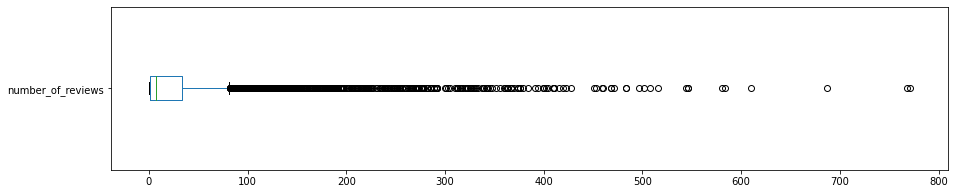

number_of_reviews: valores acima de 81.0000:
698 entradas
12.2071%


In [ ]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("number_of_reviews: valores acima de {:,.4f}:".format(sup_number_of_reviews))
print("{} entradas".format(len(df[df.number_of_reviews > sup_number_of_reviews])))
print("{:.4f}%".format((len(df[df.number_of_reviews > sup_number_of_reviews]) / df.shape[0])*100))

### Aplicando tratamento de **outlier** na variável **calculated_host_listings_count**

In [ ]:
# identificando os outliers para a variável calculated_host_listings_count
q1_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.25)
q3_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.75)
IQR_calculated_host_listings_count = q3_calculated_host_listings_count - q1_calculated_host_listings_count
print('IQR da variável calculated_host_listings_count: ', IQR_calculated_host_listings_count)

# definindo os limites                                       
sup_calculated_host_listings_count = q3_calculated_host_listings_count + 1.5 * IQR_calculated_host_listings_count
inf_calculated_host_listings_count = q1_calculated_host_listings_count - 1.5 * IQR_calculated_host_listings_count

print('Limite superior de price: ', sup_calculated_host_listings_count)
print('Limite inferior de price: ', inf_calculated_host_listings_count)

IQR da variável calculated_host_listings_count:  3.0
Limite superior de price:  8.5
Limite inferior de price:  -3.5


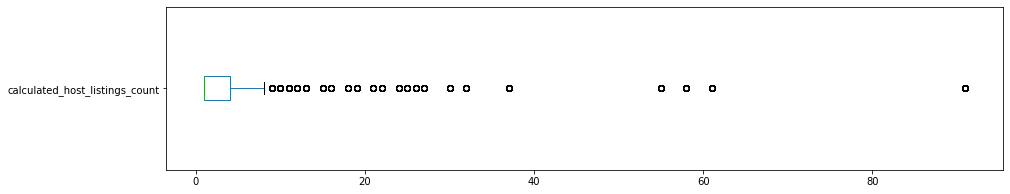

calculated_host_listings_count: valores acima de 8.5000:
982 entradas
17.1738%


In [ ]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("calculated_host_listings_count: valores acima de {:,.4f}:".format(sup_calculated_host_listings_count))
print("{} entradas".format(len(df[df.calculated_host_listings_count > sup_calculated_host_listings_count])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > sup_calculated_host_listings_count]) / df.shape[0])*100))

In [ ]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > sup_number_of_reviews].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > sup_calculated_host_listings_count].index, axis=0, inplace=True)


print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)
print('Percentual de dados excluidos em relação ao total: {}'.format((1- df_clean.shape[0]/df.shape[0]) * 100))

Shape antes da limpeza:  (5718, 15)
Shape após a limpeza:  (3348, 15)
Percentual de dados excluidos em relação ao total: 41.44805876180483


>Após a retirada dos outliers, percebemos que excluímos 41% do nosso dataframe, ou seja, o dataframe atual está com **3348** registros.

* Abaixo, podemos verificar a mudança na distribuição das variáveis, indicando dados melhor distribuidos e por consequencia reduzindo algum viés.




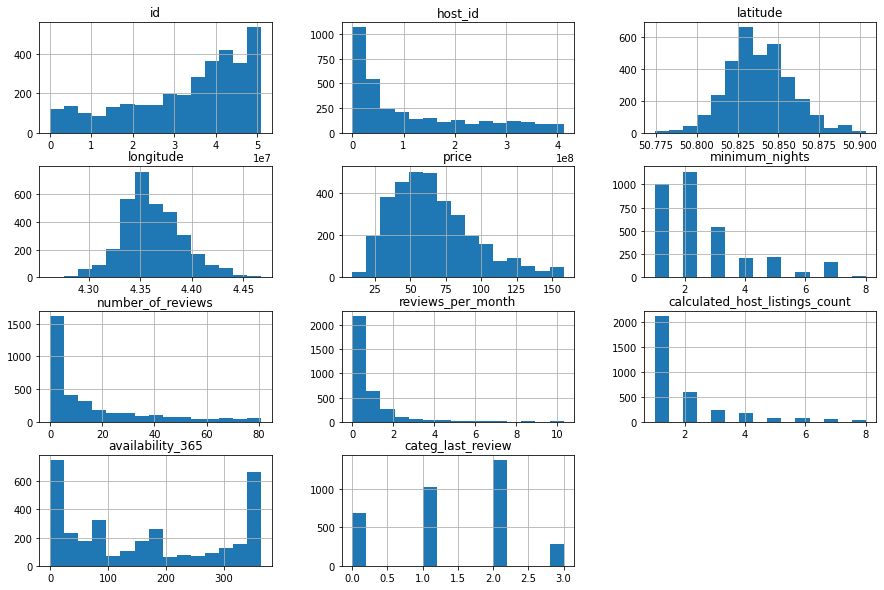

In [ ]:
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,categ_last_review
count,3.348000e+03,3.348000e+03,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,3.320195e+07,1.166670e+08,50.838159,4.361977,64.606631,2.523297,14.607228,0.717948,1.820789,165.244922,1.369773
std,1.431703e+07,1.202636e+08,0.019915,0.029189,28.790388,1.636635,19.174139,1.026646,1.463476,135.795567,0.898862
min,2.352000e+03,2.582000e+03,50.774130,4.262380,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.329685e+07,2.001185e+07,50.825210,4.343203,43.000000,1.000000,1.000000,0.070000,1.000000,34.000000,1.000000
50%,3.733630e+07,6.006088e+07,50.836660,4.357920,60.000000,2.000000,6.000000,0.370000,1.000000,148.000000,1.000000
75%,4.452334e+07,1.996470e+08,50.850678,4.380275,80.000000,3.000000,21.000000,0.980000,2.000000,316.000000,2.000000
max,5.099653e+07,4.123949e+08,50.903680,4.467680,158.000000,8.000000,81.000000,10.310000,8.000000,365.000000,3.000000


In [ ]:
# identificando os outliers para a variável number_of_reviews
q1_number_of_reviews = df_clean.number_of_reviews.quantile(.25)
q3_number_of_reviews = df_clean.number_of_reviews.quantile(.75)
IQR_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
print('IQR da variável number_of_reviews: ', IQR_number_of_reviews)

# definindo os limites                                       
sup_number_of_reviews = q3_number_of_reviews + 1.5 * IQR_number_of_reviews
inf_number_of_reviews = q1_number_of_reviews - 1.5 * IQR_number_of_reviews

print('Limite superior de price: ', sup_number_of_reviews)
print('Limite inferior de price: ', inf_number_of_reviews)

IQR da variável number_of_reviews:  20.0
Limite superior de price:  51.0
Limite inferior de price:  -29.0


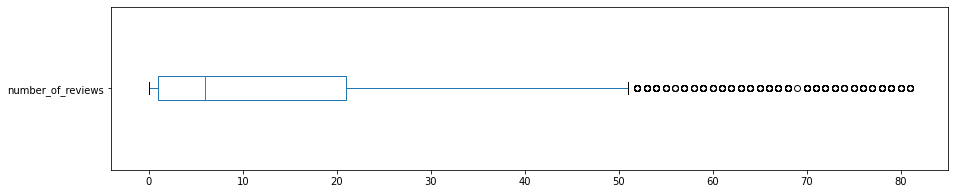

number_of_reviews: valores acima de 51.0000:
239 entradas
7.1386%


In [ ]:
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("number_of_reviews: valores acima de {:,.4f}:".format(sup_number_of_reviews))
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews > sup_number_of_reviews])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews > sup_number_of_reviews]) / df_clean.shape[0])*100))

Tabém é possível perceber através do gráfico acima, como os dados estão melhor distribídos e a média e a mediana bem mais próximas e um desvio padrão bem menor em relação ao dado anterior.

### **Analisando os preços médio de alguel**

Para analisar o preço médio fizemos uma comparação estatística dos dados sem a exclusão dos outliers com os dados após o tratamento dos outliers.

In [ ]:
# ver a média da coluna `price` anterior
df.price.describe()

count    5718.000000
mean       83.652151
std       144.053468
min         0.000000
25%        43.000000
50%        60.000000
75%        89.000000
max      5000.000000
Name: price, dtype: float64

In [ ]:
# ver a média da coluna `price` posterior ao tratamento dos outliers
df_clean.price.describe()

count    3348.000000
mean       64.606631
std        28.790388
min         9.000000
25%        43.000000
50%        60.000000
75%        80.000000
max       158.000000
Name: price, dtype: float64

> Ao compararmos o valor médio antes da exclusão **(83.65)** dos outliers e após a exclusão **(64.60)** percebemos naturalmente um redução no valor da média, mas, observando o desvio padrão, podemos perceber que a variação dos dados está bem menor do que o anterior. 
Podemos observar o histograma para entender melhor.

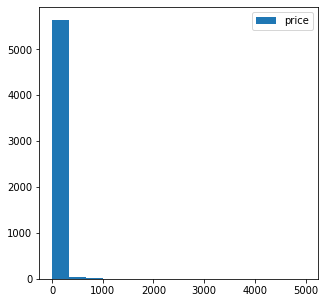

In [ ]:
df.price.hist(bins=15,  figsize=(5,5), grid=False, legend=True);

* No histograma acima, percebe-se uma coluna muito superior as outras, demonstrando o valor máximo de 5000 como valor de diária. Outlier claro.

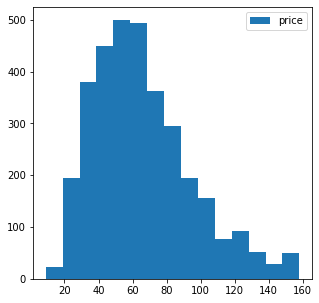

In [ ]:
df_clean.price.hist(bins=15, figsize=(5,5), grid=False, legend=True);

Neste outro histograma, é possível obsevar que a distribuição dos dados está se aproximando de uma curva normal.

### **Estudando as correlações**

Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis. 
Por exemplo, a correlação entre a estatura dos pais e a estatura dos pais e dos filhos. Embora seja comumente denotada como a medida de relação entre duas variáveis aleatórias, **correlação não implica causalidade**. Em alguns casos, correlação não identifica dependência entre as variáveis. Em geral, há pares de variáveis que apresentam forte dependência estatística, mas que possuem correlação nula. Para este casos, são utilizadas outras medidas de dependência.

Informalmente correlação é sinônimo de dependência. Formalmente variáveis são dependentes se não satisfizerem a propriedade matemática da independência probabilística. Em termos técnicos, correlação refere–se a qualquer um dos vários tipos específicos de relação entre os valores médios. Existem diferentes coeficientes de correlação para medir o grau de correlação. Um dos coeficientes de correlação mais conhecidos é o coeficiente de correlação de Pearson, obtido pela divisão da covariância de duas variáveis pelo produto dos seus desvios padrão e sensível a uma relação linear entre duas variáveis. Entretanto, há outros coeficientes de correlação mais robustos que o coeficiente de correlação de Pearson. Isto é, mais sensíveis às relações não lineares.

*Fonte:* [Wikipedia](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 0 to 5714
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3348 non-null   int64  
 1   name                            3348 non-null   object 
 2   host_id                         3348 non-null   int64  
 3   host_name                       3348 non-null   object 
 4   neighbourhood                   3348 non-null   object 
 5   latitude                        3348 non-null   float64
 6   longitude                       3348 non-null   float64
 7   room_type                       3348 non-null   object 
 8   price                           3348 non-null   int64  
 9   minimum_nights                  3348 non-null   int64  
 10  number_of_reviews               3348 non-null   int64  
 11  reviews_per_month               3348 non-null   float64
 12  calculated_host_listings_count  33

Para analisar a correlação, escolhemos somente as variáveis que de alguma maneira poderão contribuir para o modelo de ML. Dessa forma, variáveis com valores únicos, nomes e datas, não foram consideradas. As variáveis neighbourhood e room_type, por serem de grande relevancia, foram transformadas para números ordinais.

#### **Aplicando OrdinalEncoder**

In [ ]:
enc = OrdinalEncoder()
df_clean[["cat_neighbourhood","cat_room_type"]] = enc.fit_transform(df_clean[["neighbourhood","room_type"]])

In [ ]:
# criar uma matriz de correlação

corr = df_clean[['price','cat_neighbourhood','latitude','longitude','cat_room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','categ_last_review']].corr()

display(corr)
# mostrar a matriz de correlação


,price,cat_neighbourhood,latitude,longitude,cat_room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,categ_last_review
price,1.000000,-0.088803,0.006506,-0.019479,-0.418940,-0.011425,-0.036537,-0.063330,0.002652,0.093222,0.011187
cat_neighbourhood,-0.088803,1.000000,-0.161977,0.277439,0.024871,0.046990,-0.028956,-0.062534,-0.074960,-0.005859,-0.005831
latitude,0.006506,-0.161977,1.000000,-0.013250,0.008935,-0.072541,0.016943,0.061017,0.053832,0.063395,-0.002859
longitude,-0.019479,0.277439,-0.013250,1.000000,0.008766,0.057440,-0.017248,-0.011724,-0.037052,-0.010419,0.016012
cat_room_type,-0.418940,0.024871,0.008935,0.008766,1.000000,-0.203692,-0.017884,-0.095680,0.171495,0.097769,0.023306
minimum_nights,-0.011425,0.046990,-0.072541,0.057440,-0.203692,1.000000,-0.083230,-0.173246,-0.104785,-0.088972,0.000235
number_of_reviews,-0.036537,-0.028956,0.016943,-0.017248,-0.017884,-0.083230,1.000000,0.438816,0.086088,0.004343,0.423353
reviews_per_month,-0.063330,-0.062534,0.061017,-0.011724,-0.095680,-0.173246,0.438816,1.000000,0.124082,-0.033894,0.076386
calculated_host_listings_count,0.002652,-0.074960,0.053832,-0.037052,0.171495,-0.104785,0.086088,0.124082,1.000000,0.109161,0.003376
availability_365,0.093222,-0.005859,0.063395,-0.010419,0.097769,-0.088972,0.004343,-0.033894,0.109161,1.000000,-0.033958


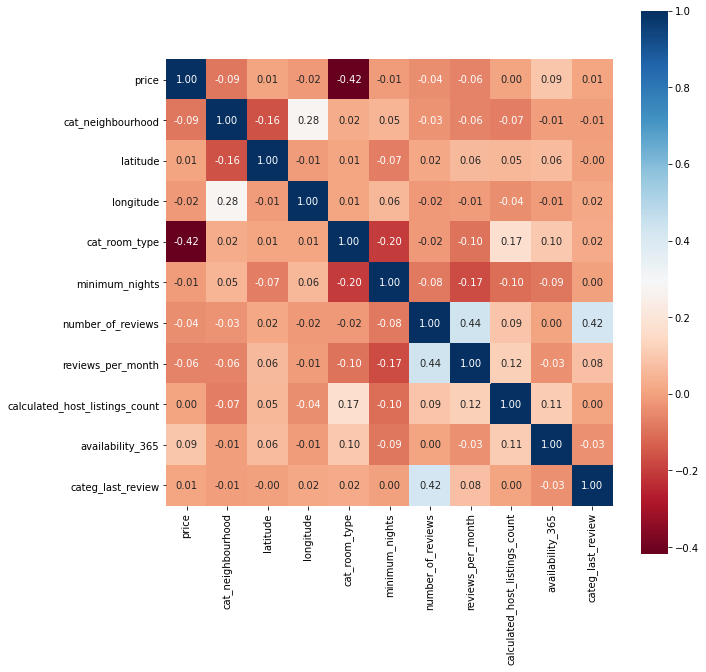

In [ ]:
# heatmap a partir das correlações

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);


Ao analisar essas correlações percebi um possível erro ao colocar os dados da variável "room_type" como ordinais, pois ocorreu um peso negativo e sem uma lógica aparente em relação ao Preço. Irei transformar essas duas variaveis como binárias (dummies) e executar a correlação novamente.

Como as correlações da latitude e longitude não apresentaram uma boa performance, resolvi tentar gerar uma variável unica a partir das duas. Multiplicamos uma pela outra para tentar obter um melhor resultado.


In [ ]:
df_clean.drop(['cat_neighbourhood','cat_room_type'],axis=1,inplace=True)

nominal = ['neighbourhood','room_type']

dum = dummie(nominal,df_clean)

In [ ]:
dum.head()

,neighbourhood_Anderlecht,neighbourhood_Auderghem,neighbourhood_Berchem-Sainte-Agathe,neighbourhood_Bruxelles,neighbourhood_Etterbeek,neighbourhood_Evere,neighbourhood_Forest,neighbourhood_Ganshoren,neighbourhood_Ixelles,neighbourhood_Jette,neighbourhood_Koekelberg,neighbourhood_Molenbeek-Saint-Jean,neighbourhood_Saint-Gilles,neighbourhood_Saint-Josse-ten-Noode,neighbourhood_Schaerbeek,neighbourhood_Uccle,neighbourhood_Watermael-Boitsfort,neighbourhood_Woluwe-Saint-Lambert,neighbourhood_Woluwe-Saint-Pierre,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Separa somente as colunas do dataframe original que serão necessárias para o novo Dataframe
col = ['price','latitude','longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','categ_last_review']

columns = set(col) - set(nominal)

columns


{'availability_365',
 'calculated_host_listings_count',
 'categ_last_review',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'reviews_per_month'}

In [ ]:
dfCorr = pd.concat([df_clean[columns],dum], axis=1).corr()

dfCorr

,longitude,latitude,availability_365,number_of_reviews,minimum_nights,calculated_host_listings_count,reviews_per_month,price,categ_last_review,neighbourhood_Anderlecht,neighbourhood_Auderghem,neighbourhood_Berchem-Sainte-Agathe,neighbourhood_Bruxelles,neighbourhood_Etterbeek,neighbourhood_Evere,neighbourhood_Forest,neighbourhood_Ganshoren,neighbourhood_Ixelles,neighbourhood_Jette,neighbourhood_Koekelberg,neighbourhood_Molenbeek-Saint-Jean,neighbourhood_Saint-Gilles,neighbourhood_Saint-Josse-ten-Noode,neighbourhood_Schaerbeek,neighbourhood_Uccle,neighbourhood_Watermael-Boitsfort,neighbourhood_Woluwe-Saint-Lambert,neighbourhood_Woluwe-Saint-Pierre,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
longitude,1.000000,-0.013250,-0.010419,-0.017248,0.057440,-0.037052,-0.011724,-0.019479,0.016012,-0.342993,0.255609,-0.161808,-0.084598,0.239830,0.157508,-0.231338,-0.120883,0.125755,-0.153665,-0.122973,-0.237285,-0.197374,0.053032,0.224502,-0.123132,0.182929,0.380437,0.321033,-0.006814,-0.033497,0.017376,-0.016684
latitude,-0.013250,1.000000,0.063395,0.016943,-0.072541,0.053832,0.061017,0.006506,-0.002859,-0.020142,-0.138939,0.092861,0.327442,-0.052090,0.165843,-0.228978,0.127838,-0.262114,0.262582,0.124242,0.185165,-0.160807,0.109078,0.323645,-0.463485,-0.196674,0.079715,-0.025661,-0.009696,0.017141,0.003781,0.012050
availability_365,-0.010419,0.063395,1.000000,0.004343,-0.088972,0.109161,-0.033894,0.093222,-0.033958,0.042517,-0.025116,0.034824,0.006239,0.005177,0.019021,-0.054653,0.010758,-0.021123,0.028547,0.032554,0.032503,-0.052895,0.016081,0.004289,0.001861,-0.005366,0.016096,0.022056,-0.106334,0.101277,0.079606,0.031527
number_of_reviews,-0.017248,0.016943,0.004343,1.000000,-0.083230,0.086088,0.438816,-0.036537,0.423353,0.005998,0.006911,-0.006164,0.054069,-0.030808,0.001719,-0.020687,0.007148,-0.016477,-0.016963,0.005960,-0.026808,0.015666,0.015447,-0.012607,-0.007660,0.009068,-0.015174,-0.013321,0.015998,-0.022789,-0.002222,-0.047048
minimum_nights,0.057440,-0.072541,-0.088972,-0.083230,1.000000,-0.104785,-0.173246,-0.011425,0.000235,-0.054565,-0.001168,-0.018519,-0.072319,0.050880,0.018573,0.027043,-0.016870,0.052211,-0.028405,-0.030571,-0.027292,0.065407,-0.011789,-0.003139,-0.006700,0.006371,0.024143,-0.025154,0.209524,-0.084663,-0.184255,-0.049411
calculated_host_listings_count,-0.037052,0.053832,0.109161,0.086088,-0.104785,1.000000,0.124082,0.002652,0.003376,0.000520,-0.039108,-0.021701,0.125565,-0.001167,-0.047582,-0.054372,-0.026073,-0.029101,-0.033953,0.004262,-0.019210,0.082176,0.001787,-0.004452,-0.078792,-0.019922,-0.043547,-0.040686,-0.195086,0.202769,0.154741,-0.006684
reviews_per_month,-0.011724,0.061017,-0.033894,0.438816,-0.173246,0.124082,1.000000,-0.063330,0.076386,-0.015807,-0.029090,-0.007811,0.130521,-0.033532,-0.008640,-0.037631,-0.008758,-0.018114,-0.001184,0.007429,-0.038214,-0.008091,0.004523,-0.016072,-0.032540,-0.012953,-0.013998,0.003120,0.098469,-0.042506,-0.085510,-0.025793
price,-0.019479,0.006506,0.093222,-0.036537,-0.011425,0.002652,-0.063330,1.000000,0.011187,-0.000494,0.004445,-0.026664,0.118067,-0.013835,-0.020490,-0.025903,-0.004217,0.003833,0.008051,0.021151,-0.022036,-0.043961,-0.027892,-0.042869,-0.006757,-0.001976,-0.033915,-0.007425,0.399374,0.137141,-0.418343,-0.082262
categ_last_review,0.016012,-0.002859,-0.033958,0.423353,0.000235,0.003376,0.076386,0.011187,1.000000,0.011760,0.028061,-0.016615,0.009301,0.006758,0.010549,-0.035736,-0.008962,-0.014950,-0.024413,0.004733,-0.004242,0.016269,0.005262,0.005867,-0.014181,0.022558,0.009865,-0.015612,-0.027287,0.021552,0.025992,-0.015888
neighbourhood_Anderlecht,-0.342993,-0.020142,0.042517,0.005998,-0.054565,0.000520,-0.015807,-0.000494,0.011760,1.000000,-0.028303,-0.015811,-0.121889,-0.050809,-0.022734,-0.051112,-0.016247,-0.096590,-0.027793,-0.021783,-0.041465,-0.075458,-0.033648,-0.062792,-0.055916,-0.024818,-0.038697,-0.028303,-0.037422,0.033935,0.031242,-0.003794


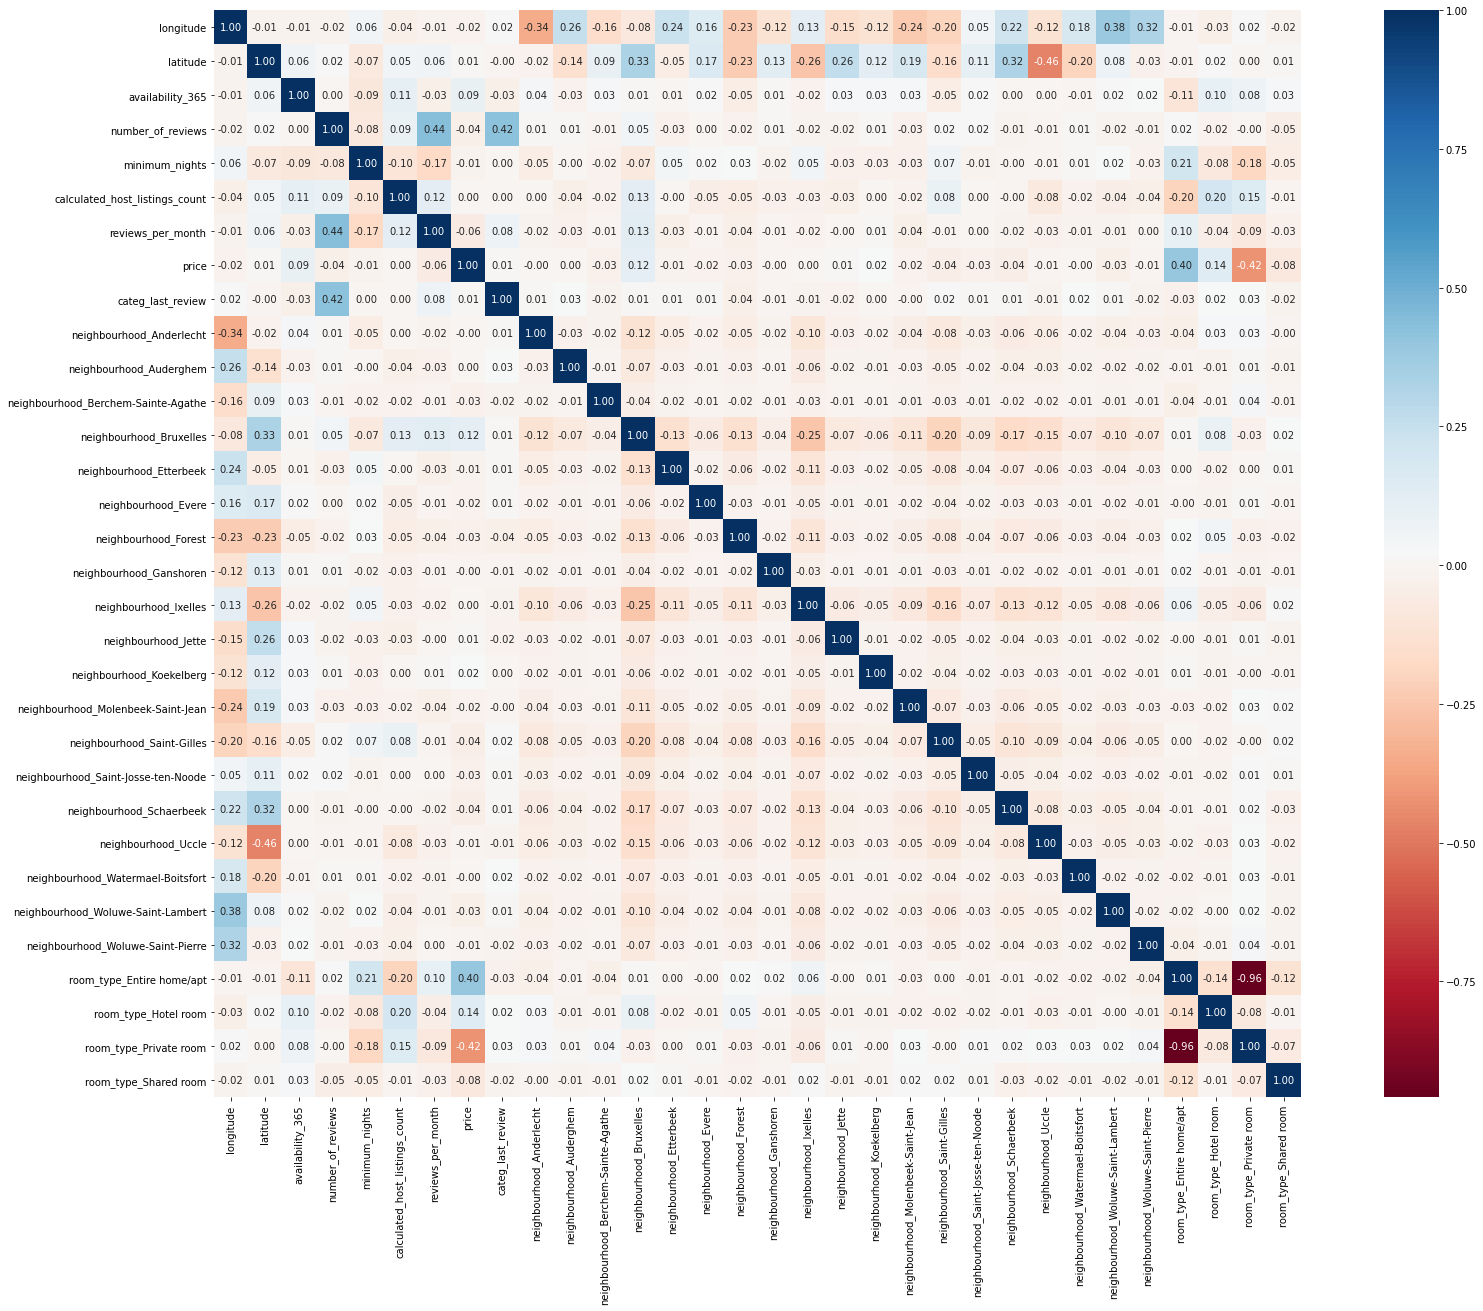

In [ ]:
# plotar um heatmap a partir das correlações

fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
sns.heatmap(dfCorr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

**Multicolinearidade** consiste em um problema comum em regressões, no qual as variáveis independentes possuem relações lineares exatas ou aproximadamente exatas. O índício mais claro da existência da multicolinearidade é quando o R² é bastante alto, mas nenhum dos coeficientes da regressão é estatisticamente significativo segundo a estatística t convencional. As consequências da multicolinearidade em uma regressão são a de erros-padrão elevados no caso de multicolinearidade moderada ou severa e até mesmo a impossibilidade de qualquer estimação se a multicolinearidade for perfeita.

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Multicolinearidade)

Neste Caso, encontramos algumas ***possíveis*** multicolinearidades como:
* room_type_Priveite_room com room_type_entire home/apt;
* Reviews_per_month com number_of_revies;

É necessário tratar as multicolinearidades para evitar problemas de overfiting nos modelos de machine learning.

### **Analisando os imóveis disponíveis no Airbnb?**

Para estudar os imóveis disponíveis, utilizamos o cruzamento dos tipos de imóvel disponíveis com a quantidade de anuncios. Também analisamos de acordo com a disponibilidade dos imóveis nos próximos 365 dias, pensando que quanto mais um imóvel tem disponibilidade, menos aquele tipo é requisitado. 


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.groupby(['room_type'])['id'].count().sort_values(ascending=False)

room_type
Entire home/apt    2135
Private room       1149
Hotel room           36
Shared room          28
Name: id, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

(df_clean.groupby(['room_type'])['id'].count()/df_clean.room_type.count()).sort_values(ascending=False)

room_type
Entire home/apt    0.637694
Private room       0.343190
Hotel room         0.010753
Shared room        0.008363
Name: id, dtype: float64

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
result_df = pd.concat([df_clean.groupby(['room_type'])['id'].count().sort_values(ascending=False), (df_clean.groupby(['room_type'])['id'].count()/df_clean.room_type.count()).sort_values(ascending=False)],axis=1 )

In [ ]:
result_df.columns = ['Quantidade','Percentual']

In [ ]:
result_df

,Quantidade,Percentual
room_type,,
Entire home/apt,2135,0.637694
Private room,1149,0.343190
Hotel room,36,0.010753
Shared room,28,0.008363


Percebemos que imóveis inteiros e quartos privados são os que tem maior disponibilidade.

Analisando pela disponibilidade nos próximos 365 dias.

In [ ]:
df_clean[['availability_365']].describe()

,availability_365
count,3348.000000
mean,165.244922
std,135.795567
min,0.000000
25%,34.000000
50%,148.000000
75%,316.000000
max,365.000000


In [ ]:
condition = df_clean.availability_365 < df_clean['availability_365'].quantile(.50)
results_2 = df_clean[condition]
results_2.groupby(['room_type'])['id'].count().sort_values(ascending=False)

room_type
Entire home/apt    1133
Private room        521
Shared room          12
Hotel room            2
Name: id, dtype: int64

In [ ]:
(results_2.groupby(['room_type'])['id'].count()/results_2.room_type.count()).sort_values(ascending=False)

room_type
Entire home/apt    0.679257
Private room       0.312350
Shared room        0.007194
Hotel room         0.001199
Name: id, dtype: float64

Se considerarmos que os imóveis que possuem menor disponibilidade são mais locados, e que 50% dos imóveis possuem menos de 148 diárias disponíveis para locação nos próximos 365 dias, podemos inferir que os imóveis inteiros são mais locados que os outros tipos.


---



### **Analisando preços de acordo com as localidades dos imóveis**

Para esta analise consideramos os preços médios por bairro e também fizemos um mapa de acordo com a latitude e longitude no intuito de demostrar as regioes e seus difentes preços médios.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').agg(price=('price','mean'), qtd=('id','count')).sort_values(by=['price'], ascending=False)

,price,qtd
neighbourhood,,
Koekelberg,70.617647,34
Bruxelles,70.603194,814
Jette,66.400000,55
Auderghem,65.578947,57
Ixelles,64.852313,562
Anderlecht,64.540541,148
Watermael-Boitsfort,64.113636,44
Uccle,63.858491,212
Ganshoren,63.000000,19


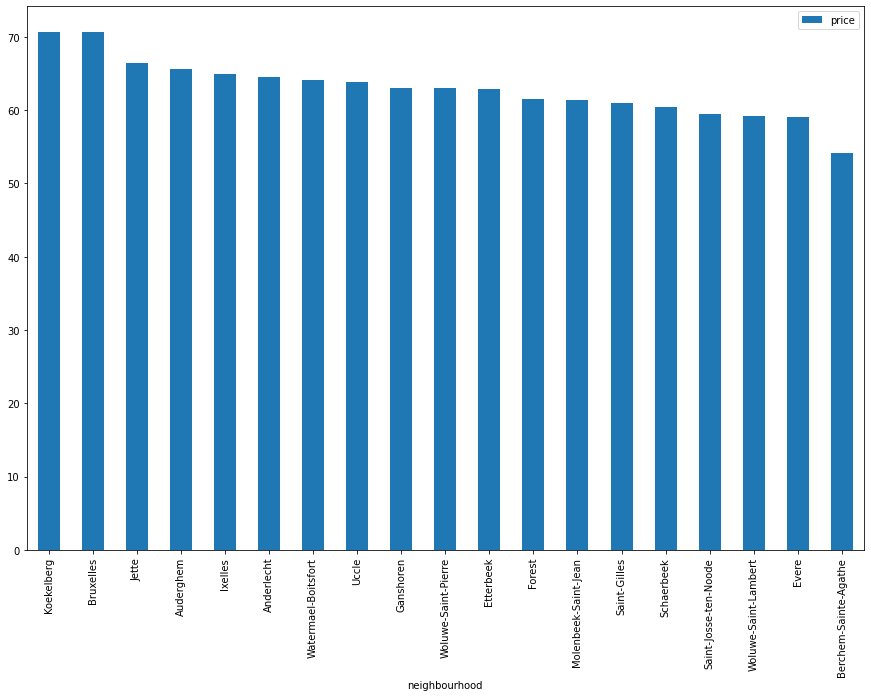

In [ ]:
df_clean.groupby('neighbourhood').agg(price=('price','mean'), qtd=('id','count')).sort_values(by=['price'], ascending=False)[['price']].plot(kind='bar',figsize=(15,10));

In [ ]:
# ver preços por bairros, na média
gr = df_clean.groupby(['room_type','neighbourhood']).agg(price=('price','mean')).sort_values(by=['price'], ascending=False).reset_index()

Observando a média por bairro, identificamos uma variação relativamente baixa do preço médio. Mas o bairro mais caro é o bairro Koekelberg. Importante considerar que pela diferença de preço em relação ao Bairro Bruxelles e de acordo com a quantidade amostral, pode ser que o preço médio do bairro Koekelberg esteja com um viés, o que precisamos analisar um pouco mais para entender o correto comportamento

In [ ]:
gr.describe()

,price
count,51.000000
mean,61.451052
std,23.267529
min,25.000000
25%,44.291124
50%,62.500000
75%,74.266525
max,137.000000


In [ ]:
gr

,room_type,neighbourhood,price
0,Hotel room,Saint-Gilles,137.000000
1,Hotel room,Anderlecht,116.000000
2,Hotel room,Forest,102.333333
3,Hotel room,Bruxelles,102.285714
4,Entire home/apt,Koekelberg,87.304348
5,Entire home/apt,Watermael-Boitsfort,84.541667
6,Entire home/apt,Jette,80.228571
7,Shared room,Anderlecht,80.000000
8,Entire home/apt,Bruxelles,77.190476
9,Entire home/apt,Auderghem,77.114286


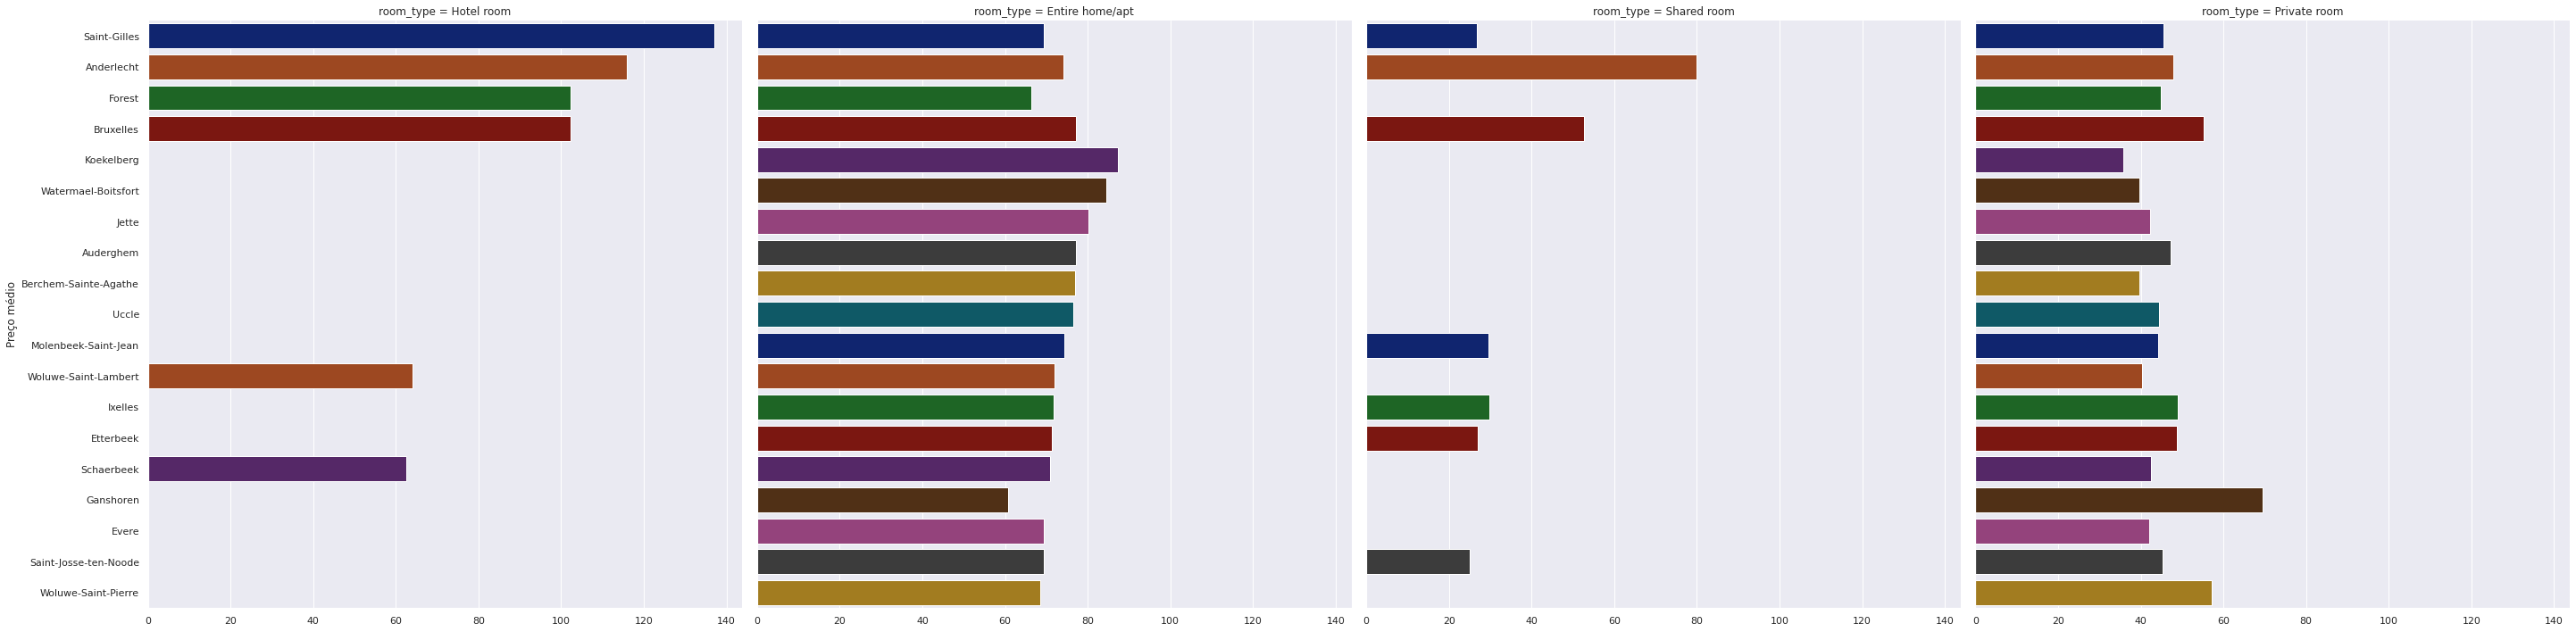

In [ ]:
import seaborn as sns
sns.set_theme()

g = sns.catplot(
    data=gr, kind="bar",orient="h",
    y="neighbourhood", x="price", col="room_type",
    ci="None", palette="dark", height=10, legend=True
)
g.despine(left=False)
g.set_axis_labels("", "Preço médio");
#g.legend.set_title("Preço médio por Bairro e tipo de Imóvel")

Observando o Gráfico acima, é possível identificar que as maior disponibilidade de imóveis são do tipo apartamento inteiro e quarto privado.

Os imoveis com melhor preço são quartos compartilhados e ficam no bairro Saint-josse-ten-Noode.

No gráfico abaixo é possível perceber que a média de preço em relação ao local de estadia não varia tanto na cidade de Bruxelas.

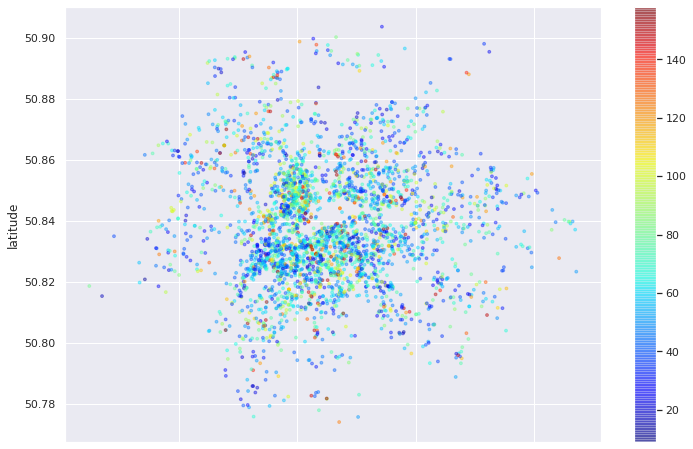

In [ ]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Observando o gráfico não é possível identificar uma região onde um determinado preço seja prevalente, confirmando assim os dados numéricos analisados anteriormente.

### **Analisando a quantidade de noites mínimas para aluguel (minimum_nights)?**

Cada locação tem uma restrição de noites mínimas de locação definidas pelo host. Resolvemos analisar esses dados e identificar se isso influenciou de alguma maneira em alguma outra variável.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,3348.000000
mean,2.523297
std,1.636635
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


Na média, o mínimo de noites disponível para locação é 2.52 dias por locação.

In [ ]:
df_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'categ_last_review'],
      dtype='object')

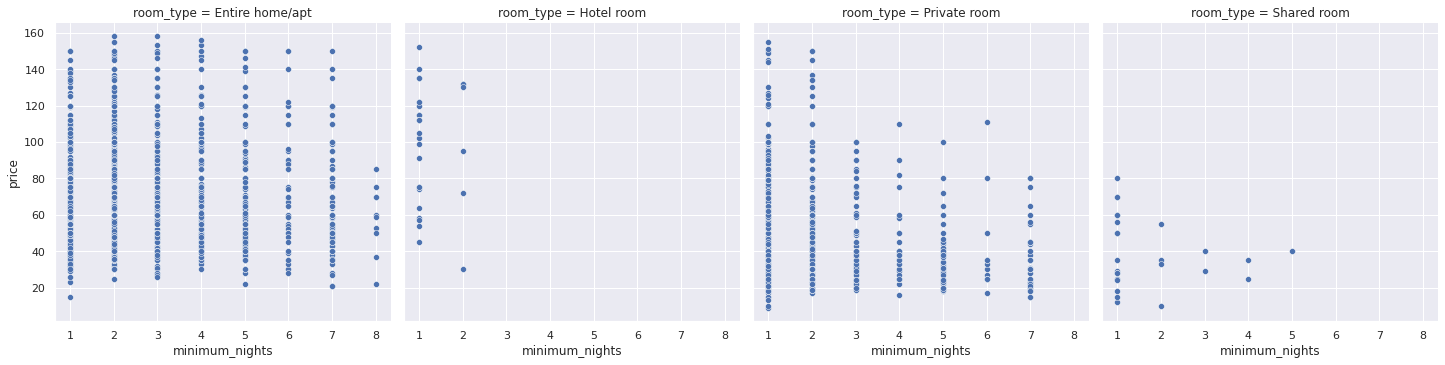

In [ ]:
sns.relplot(
    data=df_clean, x="minimum_nights", y="price",col='room_type',
    kind="scatter",
);

Analisando o mínimo de noites em relação ao preço e também ao tipo de imóvel podemos perceber que os imóveis mais flexíveis em relação o número de noites é o quarto de hotel, tendo em sua maioria a exigencia mínima de 1 dia e podemos observar também valores mais altos nestes casos.

Os imóveis com 8 ou mais diárias mínimas possuem valores menores.

Os quartos compartilhados também são flexiveis em sua maioria e com menores valores por dia.

## Conclusões


Nesta análise, percebemos que os dados indisponíveis puderam ser substituidos de maneira a não ocorrer perdas. Alguns registros apresentaram outliers onde houve a necessidade de adequar o universo dos dados, ocorrendo uma perda de 41% dos dados.

Analisando a correlação dos dados, percebemos uma possível presença de multicolinearidade, o que pode originar problemas em um treinamento de modelos de machine learning.

Se o cliente estiver procurando uma hospedagem mais em conta e sem limite mínimo de diárias, é melhor procurar o quartos compartilhados.

Se o cliente está procurando mais de 8 diárias com um melhor preço o ideal é procurar imóveis nos bairros Bruxelles ou Ixelles.

Pensando em um bom custo x benefício e sem se preocupar com diárias minimas o mais indicado seria quartos de hotel no bairro Schaerbeek.


